In [49]:
# loading our dataset ：）
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
missing_value = ["N/a", "na", np.nan,"NaN"] 
train_file = pd.read_csv('train_ctrUa4K.CSV', header = None,na_values=missing_value)
uploaded = files.upload()
test_file = pd.read_csv('test_lAUu6dG.CSV', header = None,na_values=missing_value)
train_file.head()
uploaded = files.upload()
label = pd.read_csv('sample_submission_49d68Cx.txt', header = None,na_values=missing_value)
test_file.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Urban,Smiurban,Rural
1,LP001015,0,1,1,0,5720,0,110,360,1,1,0,0,0,1,0,0
2,LP001022,0,1,1,0,3076,1500,126,360,1,0,1,0,0,1,0,0
3,LP001031,0,1,1,0,5000,1800,208,360,1,0,0,1,0,1,0,0
4,LP001035,0,1,1,0,2340,2546,100,360,NaN,0,0,1,0,1,0,0


In [50]:
# merge label file with test file
new_test = pd.merge(label, test_file)

# merging current two dataset with id
frame = [train_file, new_test]

new_dataset = pd.concat(frame)

dataset = new_dataset.drop(new_dataset.columns[[0]], axis = 1)

dataset.info()
dataset.drop([0])

dataset.head()
# x = new_dataset.drop(new_dataset.columns[[12]],axis=1)



<class 'pandas.core.frame.DataFrame'>
Int64Index: 615 entries, 0 to 614
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       602 non-null    object
 1   2       612 non-null    object
 2   3       615 non-null    object
 3   4       583 non-null    object
 4   5       615 non-null    object
 5   6       615 non-null    object
 6   7       593 non-null    object
 7   8       601 non-null    object
 8   9       565 non-null    object
 9   10      615 non-null    object
 10  11      615 non-null    object
 11  12      615 non-null    object
 12  13      615 non-null    object
 13  14      615 non-null    object
 14  15      615 non-null    object
 15  16      615 non-null    object
 16  17      615 non-null    object
dtypes: object(17)
memory usage: 86.5+ KB


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Urban,Semiurban,Rural,Loan_Status
1,0,0,1,0,5849,0,NaN,360,1,1,0,0,0,1,0,0,Y
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,N
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,Y
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,Y


In [51]:
# split the new train and test dataset
from sklearn.model_selection import train_test_split
dataset_new = dataset.fillna(0)
# dataset_new = dataset_new.drop(index = 0)
x = dataset_new.drop(dataset.columns[[16]],axis=1) 
y = dataset_new[dataset.columns[[16]]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Urban,Semiurban,Rural
1,0,0,1,0,5849,0,0,360,1,1,0,0,0,1,0,0
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0


In [52]:
# random forest 
import matplotlib.pyplot as plt
import seaborn as sns
x_train.head()
# y_train.drop([0])
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

accuracies=[]
VMA = []

def randomForest(size):
  rf_clf = RandomForestClassifier(n_estimators=size,max_depth=3,min_samples_leaf = 10)
  rf_clf.fit(x_train,y_train.values.ravel())
  y_pred = rf_clf.predict(x_train)

  # print("Train F1 Score ", f1_score(y_train,y_pred))
  print("Train Accuracy ", accuracy_score(y_train,y_pred))
  accuracies.append(accuracy_score(y_train,y_pred))
  # print("Validation Mean F1 Score: ",cross_val_score(rf_clf,x_train,y_train,cv=5,scoring='f1_macro').mean())
  print("Validation Mean Accuracy: ",cross_val_score(rf_clf,x_train,y_train.values.ravel(),cv=5,scoring='accuracy').mean())
  VMA.append(cross_val_score(rf_clf,x_train,y_train.values.ravel(),cv=5,scoring='accuracy').mean())
  # pd.crosstab(y_test, y_pred, rownames = ['True'], colnames = ['Predicted'], margin = True)

s =10
s_val=[]
for i in range(20):
  randomForest(s)
  s_val.append(s)
  s = s+10;
  
rand_plot = {"Accuracy": accuracies, "Validation Mean Accuracy": VMA, "S value": s_val}
rand_plot_df = pd.DataFrame.from_dict(rand_plot)
plt_df = rand_plot_df.melt('S value',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="S value", y="Values",hue="Metrics", data=plt_df,ax=ax)



ValueError: ignored

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

c_vals = []
result = 0
c= 0.002
base = 1.8
for i in range (20):
    a = pow(base,i)
    result = a * c
    c_vals.append(result)
    
train_accuracy = []
test_accuracy = []
for c in c_vals:
    model = LogisticRegression(C=c, multi_class="multinomial", solver="lbfgs", penalty="l2")
    model.fit(x_train, y_train)
    
    predictions = model.predict(x_test) 
    test_accuracyScore = metrics.accuracy_score(y_test, predictions)
    
    train_accuracyScore = model.score(x_train, y_train)
    train_accuracy.append(train_accuracyScore)
    test_accuracy.append(test_accuracyScore)
    print("C value is ", c)
    print(train_accuracyScore)
    print("Accuracy (%):",metrics.accuracy_score(y_test, predictions)*100,"%")
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, predictions))
    



ValueError: ignored

In [37]:
train_file

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Urban,Semiurban,Rural,Loan_Status
1,LP001002,0,0,1,0,5849,0,NaN,360,1,1,0,0,0,1,0,0,Y
2,LP001003,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,N
3,LP001005,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,Y
4,LP001006,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,LP002978,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0,1,Y
611,LP002979,0,1,1,0,4106,0,40,180,1,0,0,0,1,0,0,1,Y
612,LP002983,0,1,1,0,8072,240,253,360,1,0,1,0,0,1,0,0,Y
613,LP002984,0,1,1,0,7583,0,187,360,1,0,0,1,0,1,0,0,Y


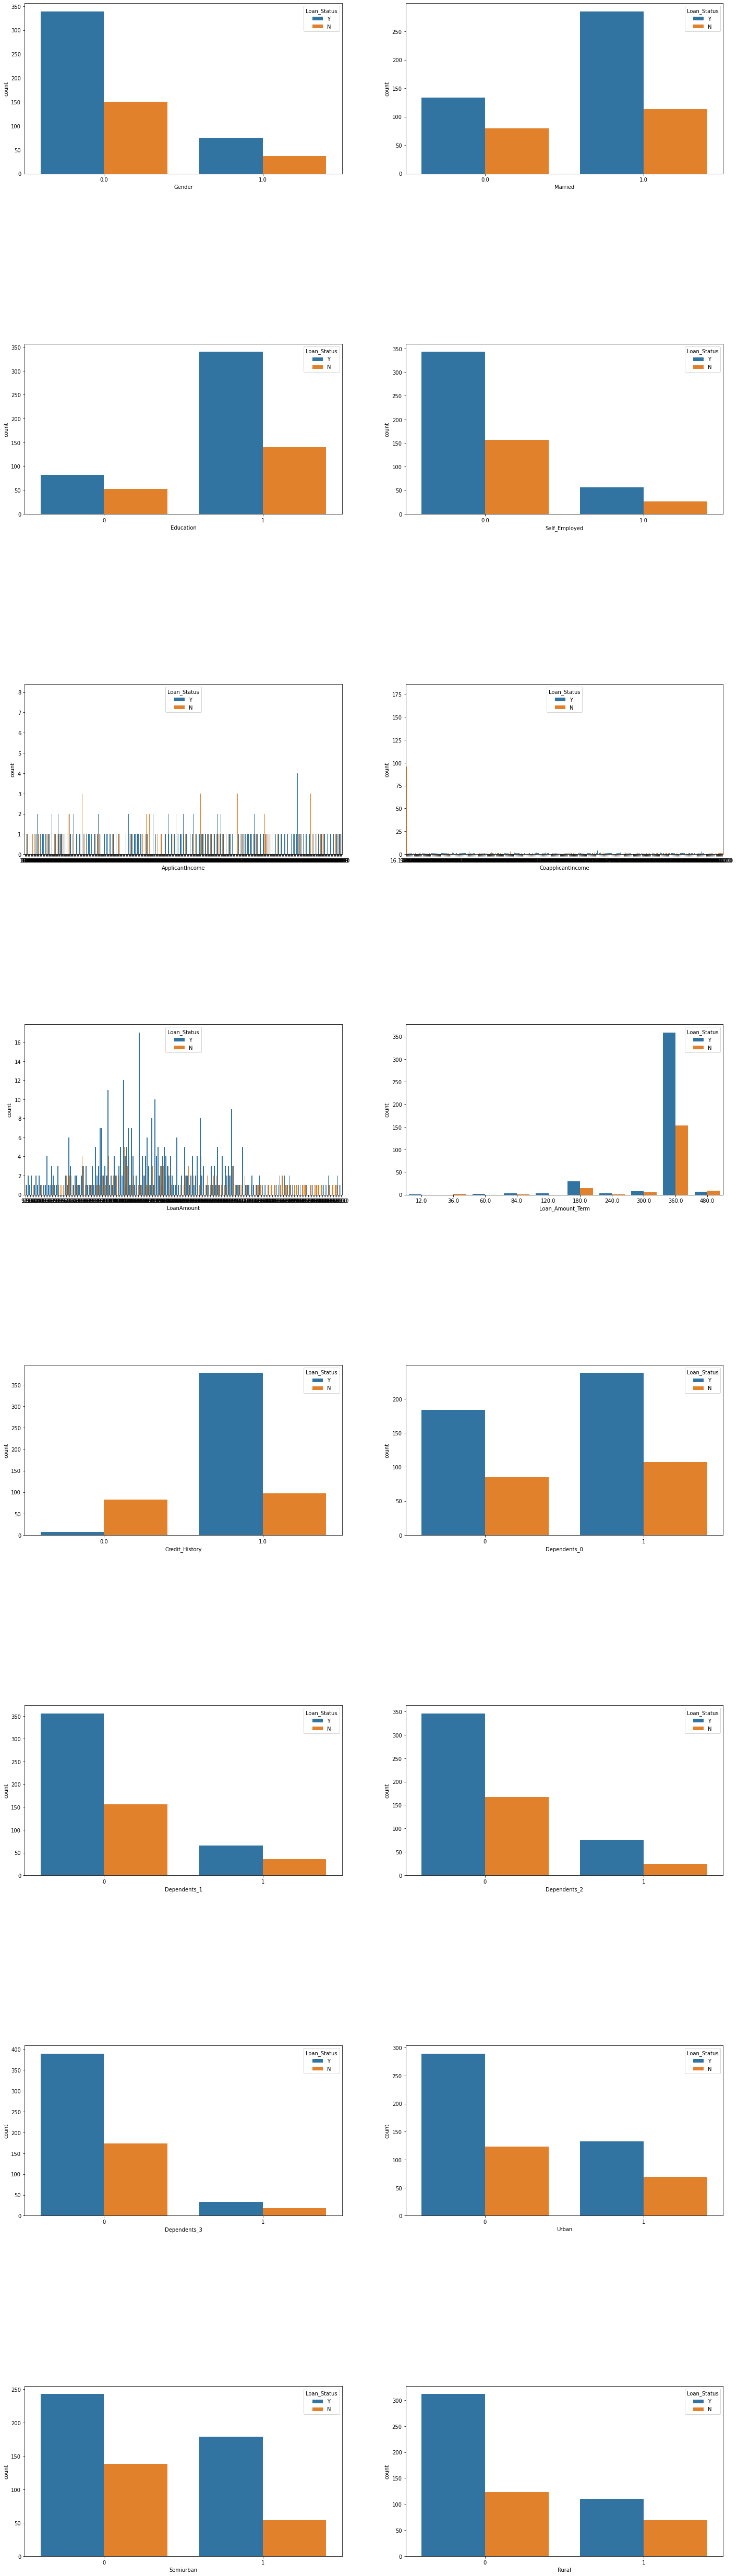

In [38]:
#Data visiulization
import seaborn as sns

train_file_new = pd.read_csv('train_ctrUa4K.CSV')
train_file_new1 = train_file_new.drop(columns=['Loan_ID'])
categorical_columns =  ['Gender', 'Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term',
                        'Credit_History', 'Dependents_0','Dependents_1','Dependents_2','Dependents_3','Urban','Semiurban','Rural']

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig,axes = plt.subplots(8,2,figsize=(24,90))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_file_new,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)

In [ ]:
dataset_new

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,0,0,1,0,5849,0,0,360,1,1,0,0,0,1,0,0,Y
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,N
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,Y
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,Y
5,0,0,1,0,6000,0,141,360,1,1,0,0,0,1,0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0,1,Y
611,0,1,1,0,4106,0,40,180,1,0,0,0,1,0,0,1,Y
612,0,1,1,0,8072,240,253,360,1,0,1,0,0,1,0,0,Y
613,0,1,1,0,7583,0,187,360,1,0,0,1,0,1,0,0,Y


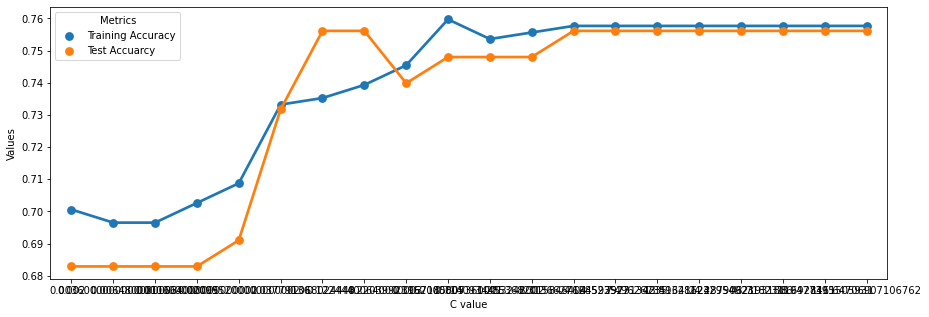

In [ ]:
Threshold_logreg = {"Training Accuracy": train_accuracy, "Test Accuarcy": test_accuracy, "C value": c_vals}
TS_LR_df = pd.DataFrame.from_dict(Threshold_logreg)
plot_df = TS_LR_df.melt('C value',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="C value", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [ ]:
# feature creation
# dataset.head()
dataset_new.head()
dataset_new
# dataset_new['new feature'] = dataset_new['Married'] * dataset_new['Education']

# dataset_new['18'] = dataset_new['2'] * dataset_new['3']

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Urban,Semiurban,Rural,Loan_Status
1,0,0,1,0,5849,0,0,360,1,1,0,0,0,1,0,0,Y
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,N
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,Y
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0,1,Y
611,0,1,1,0,4106,0,40,180,1,0,0,0,1,0,0,1,Y
612,0,1,1,0,8072,240,253,360,1,0,1,0,0,1,0,0,Y
613,0,1,1,0,7583,0,187,360,1,0,0,1,0,1,0,0,Y


In [ ]:
dataset_new.keys()


Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], dtype='int64')

In [ ]:
# have to drop index 0 that are containing string feature for calculation
dataset_new = dataset_new.drop(index = 0)
dataset_new


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
1,0,0,1,0,5849,0,0,360,1,1,0,0,0,1,0,0,Y
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,N
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,Y
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,Y
5,0,0,1,0,6000,0,141,360,1,1,0,0,0,1,0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0,1,Y
611,0,1,1,0,4106,0,40,180,1,0,0,0,1,0,0,1,Y
612,0,1,1,0,8072,240,253,360,1,0,1,0,0,1,0,0,Y
613,0,1,1,0,7583,0,187,360,1,0,0,1,0,1,0,0,Y


In [ ]:
type(dataset_new[2]) # type is in object
dataset_new.index


Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            605, 606, 607, 608, 609, 610, 611, 612, 613, 614],
           dtype='int64', length=615)

In [ ]:
dataset_new.columns

# type casting
dataset_new[2].astype(str).astype(int)
# dataset_new(head = None)

1      0
2      1
3      1
4      1
5      0
      ..
610    0
611    1
612    1
613    1
614    0
Name: 2, Length: 614, dtype: int64

In [ ]:
dataset

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Urban,Semiurban,Rural,Loan_Status
1,0,0,1,0,5849,0,NaN,360,1,1,0,0,0,1,0,0,Y
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,N
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,Y
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0,1,Y
611,0,1,1,0,4106,0,40,180,1,0,0,0,1,0,0,1,Y
612,0,1,1,0,8072,240,253,360,1,0,1,0,0,1,0,0,Y
613,0,1,1,0,7583,0,187,360,1,0,0,1,0,1,0,0,Y


In [48]:
# Feature creation (works!)

# build new feature from existing features 

# Gender and Married 
dataset_new[18] = (dataset_new[1].astype(str).astype(int)) * (dataset_new[2].astype(str).astype(int))
# married and eduction 
dataset_new[19] = (dataset_new[2].astype(str).astype(int)) * (dataset_new[3].astype(str).astype(int))
# Gender and Education 
dataset_new[20] = (dataset_new[1].astype(str).astype(int)) * (dataset_new[3].astype(str).astype(int))

# Gender, Married and Education
dataset_new[21] = (dataset_new[1].astype(str).astype(int)) * (dataset_new[2].astype(str).astype(int))* (dataset_new[3].astype(str).astype(int))

# Gender and Self_Employed
dataset_new[22] = (dataset_new[1].astype(str).astype(int)) * (dataset_new[4].astype(str).astype(int))

# Self_Employed and credit history
dataset_new[23] = (dataset_new[4].astype(str).astype(int)) * (dataset_new[9].astype(str).astype(int))

# Education & credit history
dataset_new[24] = (dataset_new[3].astype(str).astype(int)) * (dataset_new[9].astype(str).astype(int))

# Education & Self_Employed
dataset_new[25] = (dataset_new[3].astype(str).astype(int)) * (dataset_new[4].astype(str).astype(int))

# Education & Self_Employed & credit history
dataset_new[26] = (dataset_new[3].astype(str).astype(int)) * (dataset_new[4].astype(str).astype(int))* (dataset_new[9].astype(str).astype(int))

# Married and Self_Employed
dataset_new[27] = (dataset_new[2].astype(str).astype(int)) * (dataset_new[4].astype(str).astype(int))

# Education and Self_Employed
dataset_new[28] = (dataset_new[3].astype(str).astype(int)) * (dataset_new[4].astype(str).astype(int))

# Gender & credit history
dataset_new[29] = (dataset_new[1].astype(str).astype(int)) * (dataset_new[9].astype(str).astype(int))

# Married & credit history
dataset_new[30] = (dataset_new[2].astype(str).astype(int)) * (dataset_new[9].astype(str).astype(int))


# dataset_new

ValueError: ignored

In [ ]:
dataset_new

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1,0,0,1,0,5849,0,0,360,1,1,0,0,0,1,0,0,Y,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,1,1,0,4583,1508,128,360,1,0,1,0,0,0,0,1,N,0,1,0,0,0,0,1,0,0,0,0,0,1
3,0,1,1,1,3000,0,66,360,1,1,0,0,0,1,0,0,Y,0,1,0,0,0,1,1,1,1,1,1,0,1
4,0,1,0,0,2583,2358,120,360,1,1,0,0,0,1,0,0,Y,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,1,0,6000,0,141,360,1,1,0,0,0,1,0,0,Y,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,1,0,1,0,2900,0,71,360,1,1,0,0,0,0,0,1,Y,0,0,1,0,0,0,1,0,0,0,0,1,0
611,0,1,1,0,4106,0,40,180,1,0,0,0,1,0,0,1,Y,0,1,0,0,0,0,1,0,0,0,0,0,1
612,0,1,1,0,8072,240,253,360,1,0,1,0,0,1,0,0,Y,0,1,0,0,0,0,1,0,0,0,0,0,1
613,0,1,1,0,7583,0,187,360,1,0,0,1,0,1,0,0,Y,0,1,0,0,0,0,1,0,0,0,0,0,1
